In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [147]:
column_names = ['Id','Entity', 'Sentiment', 'Comment']
data = pd.read_csv('Twitter_Data.csv', names=column_names)

In [148]:
data.shape

(74682, 4)

In [149]:
data.head()

,Id,Entity,Sentiment,Comment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [150]:
data.isna().sum()

Id             0
Entity         0
Sentiment      0
Comment      686
dtype: int64

In [151]:
data.dropna(inplace=True)

In [152]:
data.isna().sum()

Id           0
Entity       0
Sentiment    0
Comment      0
dtype: int64

In [153]:
data.shape

(73996, 4)

In [154]:
data.duplicated().sum()

2340

In [155]:
data = data.drop_duplicates(keep='first')

In [156]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
74677    False
74678    False
74679    False
74680    False
74681    False
Length: 71656, dtype: bool

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71656 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         71656 non-null  int64 
 1   Entity     71656 non-null  object
 2   Sentiment  71656 non-null  object
 3   Comment    71656 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [158]:
data["Entity"].value_counts()

Entity
TomClancysRainbowSix                 2328
Verizon                              2319
MaddenNFL                            2315
CallOfDuty                           2314
Microsoft                            2304
WorldOfCraft                         2300
NBA2K                                2299
LeagueOfLegends                      2296
TomClancysGhostRecon                 2291
Facebook                             2289
ApexLegends                          2278
johnson&johnson                      2257
Battlefield                          2255
Amazon                               2249
CallOfDutyBlackopsColdWar            2242
FIFA                                 2238
Dota2                                2225
Overwatch                            2220
Hearthstone                          2219
HomeDepot                            2216
GrandTheftAuto(GTA)                  2208
Borderlands                          2206
Xbox(Xseries)                        2201
Google                     

In [159]:
data['Sentiment'].value_counts()

Sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

In [160]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Sentiment'] = encoder.fit_transform(data['Sentiment'])

In [161]:
data.head()

,Id,Entity,Sentiment,Comment
0,2401,Borderlands,3,im getting on borderlands and i will murder yo...
1,2401,Borderlands,3,I am coming to the borders and I will kill you...
2,2401,Borderlands,3,im getting on borderlands and i will kill you ...
3,2401,Borderlands,3,im coming on borderlands and i will murder you...
4,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...


In [162]:
data['Sentiment'].value_counts()

Sentiment
1    21698
3    19713
2    17708
0    12537
Name: count, dtype: int64

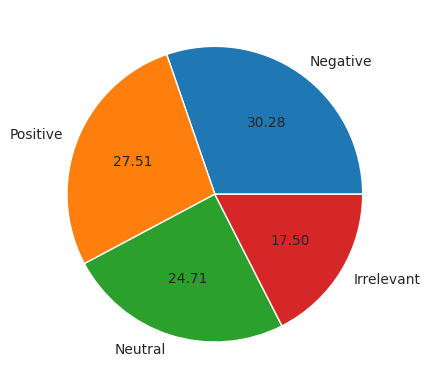

In [163]:
plt.pie(data['Sentiment'].value_counts(), labels =['Negative', 'Positive','Neutral','Irrelevant'], autopct='%0.2f')
plt.show()

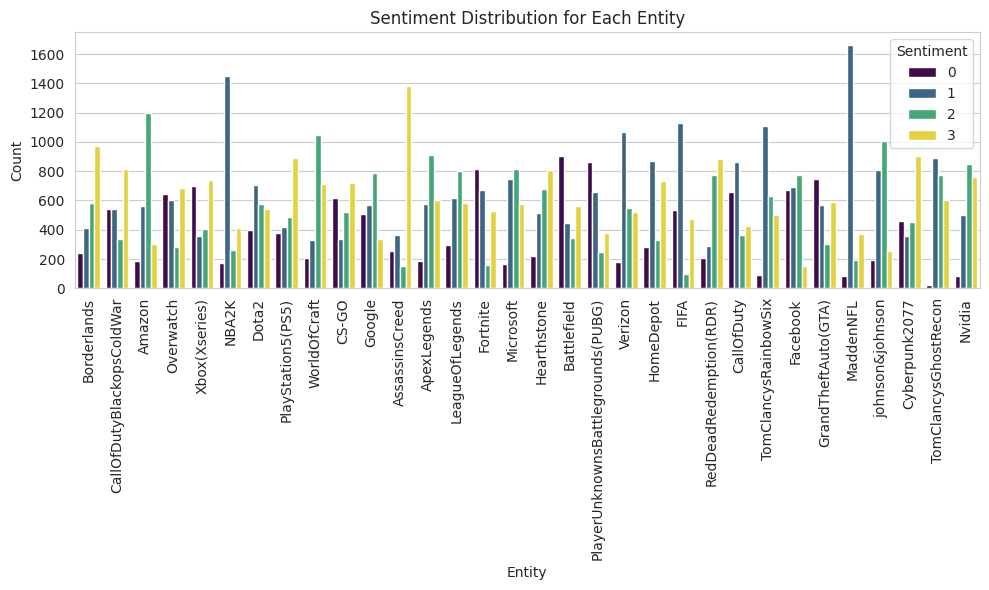

In [164]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Entity', hue='Sentiment', palette='viridis')
plt.title('Sentiment Distribution for Each Entity')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [165]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re
ps = PorterStemmer()

In [166]:
from nltk.stem import WordNetLemmatizer
Lemmatizer = WordNetLemmatizer()

In [167]:
# Cleaning the text
def transform_text(review):
    review = re.sub('[^a-zA-Z]', " ",review)
    review = review.lower()
    review = review.split()
    review = [Lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words("english"))]
    review = " ".join(review)
    corpus.append(review)

In [168]:
def transform_text(text):
    text = re.sub('[^a-zA-Z]',' ',text)
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if word not in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

In [144]:
import nltk
nltk.download('stopwords')
data['transformed_Comment'] = data['Comment'].apply(transform_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [172]:
data.head()

,Id,Entity,Sentiment,Comment,transformed_Comment
0,2401,Borderlands,3,im getting on borderlands and i will murder yo...,im get borderland murder
1,2401,Borderlands,3,I am coming to the borders and I will kill you...,come border kill
2,2401,Borderlands,3,im getting on borderlands and i will kill you ...,im get borderland kill
3,2401,Borderlands,3,im coming on borderlands and i will murder you...,im come borderland murder
4,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,im get borderland murder


In [173]:
data['transformed_Comment'] = data['Comment'].apply(transform_text)

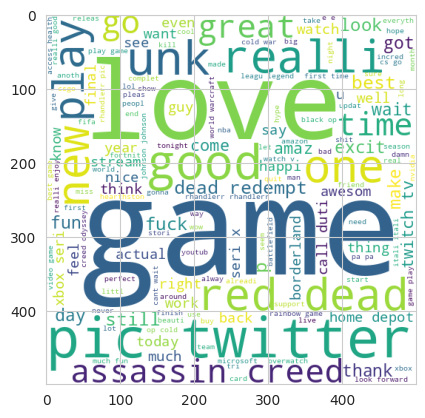

In [174]:
## Word Cloud Formation of Positive

from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color = 'white')
Positive_wc = wc.generate(data[data['Sentiment']== 3]['transformed_Comment'].str.cat(sep = " "))
plt.imshow(Positive_wc)

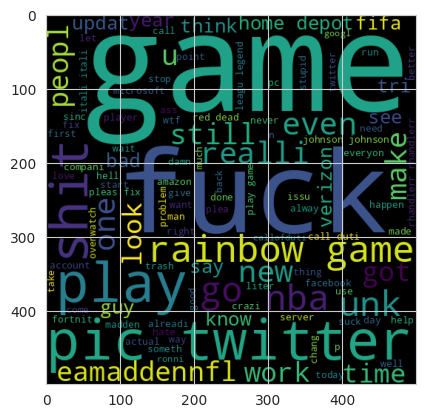

In [175]:
## Word Cloud Formation of Negative

from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color = 'black')
Negative_wc = wc.generate(data[data['Sentiment']== 1]['transformed_Comment'].str.cat(sep = " "))
plt.imshow(Negative_wc)

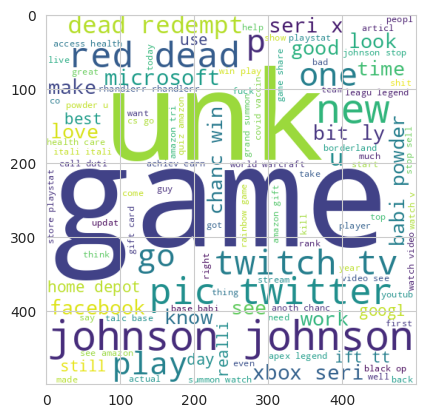

In [176]:
## Word Cloud Formation of Neutral

from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color = 'white')
Neutral_wc = wc.generate(data[data['Sentiment']== 2]['transformed_Comment'].str.cat(sep = " "))
plt.imshow(Neutral_wc)

In [177]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(max_iter=1000)

In [178]:
X = data['transformed_Comment'].values
y = data['Sentiment'].values

In [179]:
print(X)

['im get borderland murder' 'come border kill' 'im get borderland kill'
 ... 'realiz window partit mac year behind nvidia driver idea notic'
 'realiz window partit mac like year behind nvidia driver car fuck idea ever notic'
 'like window partit mac like year behind driver idea notic']


In [180]:
print(y)


[3 3 3 ... 3 3 3]


In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 2)

In [182]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [183]:
print(X_train)

  (0, 152)	0.5583606770861306
  (0, 6476)	0.6839166088027813
  (0, 10722)	0.46956514615931766
  (1, 7337)	0.3611118133669397
  (1, 17121)	0.5331858455956615
  (1, 2014)	0.5811522345297202
  (1, 5667)	0.4975672744507952
  (2, 3317)	0.12275351835808723
  (2, 4134)	0.24022605248072806
  (2, 1637)	0.23370674385490017
  (2, 4407)	0.23243728212418058
  (2, 16221)	0.1684665867342897
  (2, 12816)	0.24609325666838247
  (2, 21259)	0.3442530777994242
  (2, 7931)	0.320601365618714
  (2, 20601)	0.4253299534067424
  (2, 13884)	0.36883648274765546
  (2, 1408)	0.20180873050010323
  (2, 1310)	0.3881573162835936
  (3, 16730)	0.7533378032991295
  (3, 20754)	0.5240732772030453
  (3, 10722)	0.39727742729999416
  (4, 10451)	0.34841496600467947
  (4, 20225)	0.1642082515572038
  (4, 4386)	0.27862000000379616
  :	:
  (57321, 3524)	0.144359821233317
  (57321, 7162)	0.12202559869687057
  (57321, 12354)	0.12331131213525494
  (57321, 19249)	0.13889230860267238
  (57321, 3213)	0.10256031194203963
  (57321, 7346)	0.

In [184]:
print(X_test)

  (0, 20182)	0.2954957530134294
  (0, 20167)	0.16525036002025473
  (0, 20024)	0.26140683251346664
  (0, 18868)	0.14358966971382148
  (0, 18493)	0.26808270921215993
  (0, 16325)	0.1816102776520403
  (0, 15771)	0.16708514217166706
  (0, 14970)	0.17587995079206947
  (0, 11810)	0.18245307727594207
  (0, 11606)	0.19759353022937146
  (0, 10275)	0.18079057135861049
  (0, 10232)	0.22084375885028482
  (0, 8164)	0.18999618594627388
  (0, 5652)	0.26912081325307646
  (0, 5463)	0.19021697962842102
  (0, 5130)	0.23375540172866627
  (0, 4064)	0.251340455282364
  (0, 3903)	0.17587995079206947
  (0, 3832)	0.1572019707068388
  (0, 3709)	0.18228260725265955
  (0, 3403)	0.20136645824235092
  (0, 2851)	0.2559522440859644
  (0, 2046)	0.14655324111027979
  (1, 17305)	0.2613953384079542
  (1, 15179)	0.33856298274107965
  :	:
  (14329, 14934)	0.16129239434223494
  (14329, 14381)	0.2598236971592846
  (14329, 14325)	0.19832763981953183
  (14329, 14268)	0.1725866156599198
  (14329, 13884)	0.12588946914659035
  (1

In [185]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(max_iter=1000, random_state=2)
regressor.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=2)

In [186]:
y_pred = regressor.predict(X_test)

In [187]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_test, y_pred))

0.7743511024281329


In [188]:
print(confusion_matrix(y_test, y_pred))

[[1648  278  160  337]
 [ 115 3605  273  398]
 [ 150  366 2626  455]
 [ 153  303  246 3219]]


<Axes: >

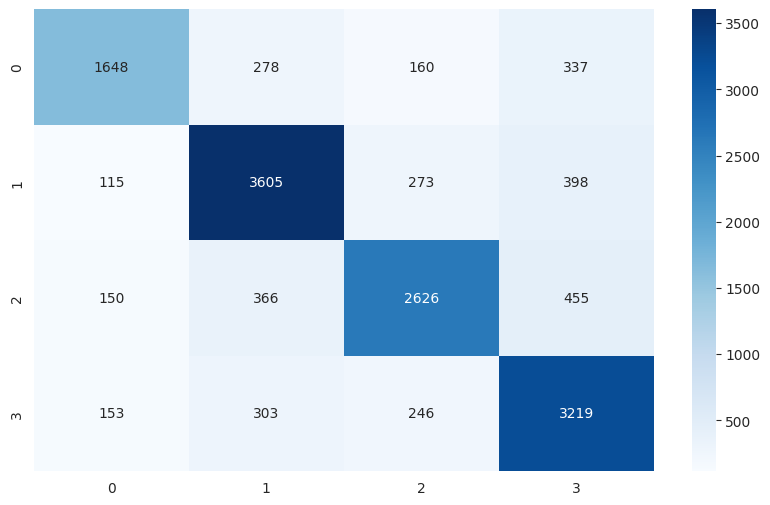

In [189]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')